# [第4章: 形態素解析](https://nlp100.github.io/ja/ch04.html)
夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](https://nlp100.github.io/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39は[matplotlib](http://matplotlib.org/)もしくは[Gnuplot](http://www.gnuplot.info/)を用いるとよい．

In [1]:
!ls Input/neko.txt

Input/neko.txt


In [2]:
!mecab Input/neko.txt > Output/Chapter04/neko.txt.mecab

## [30. 形態素解析結果の読み込み](https://nlp100.github.io/ja/ch04.html#30-%E5%BD%A2%E6%85%8B%E7%B4%A0%E8%A7%A3%E6%9E%90%E7%B5%90%E6%9E%9C%E3%81%AE%E8%AA%AD%E3%81%BF%E8%BE%BC%E3%81%BF)
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [3]:
sentences = []

with open("Output/Chapter04/neko.txt.mecab") as neko_mecab:
    sentence = []
    for line in neko_mecab:
        if line == "\n" or line == "　	記号,空白,*,*,*,*,　,　,　\n":
            continue
        elif line == "EOS\n":
            sentences.append(sentence)
            sentence = []
        else:
            # 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
            foo = line.split("\t")
            bar = foo[1].split(",")
            morpheme = {}
            morpheme["surface"] = foo[0]
            morpheme["base"] = "*" if "*\n" == bar[6] else bar[6]
            morpheme["pos"] = bar[0]
            morpheme["pos1"] = bar[1]
            sentence.append(morpheme)

## [31. 動詞](https://nlp100.github.io/ja/ch04.html#31-%E5%8B%95%E8%A9%9E)
動詞の表層形をすべて抽出せよ．

In [4]:
surfaces_verb = set()

for sentence in sentences:
    for morpheme in sentence:
        if morpheme["pos"] == "動詞":
            surfaces_verb.add(morpheme["surface"])

In [5]:
list(surfaces_verb)[:20]

['思い切っ',
 '絞',
 'かたどっ',
 '見下し',
 '浮べ',
 '引き上げる',
 'ぼっ',
 'れよ',
 '泳ぐ',
 'かえし',
 'やみ',
 'しから',
 '移っ',
 'ぶら下がっ',
 '這入れ',
 'ちまっ',
 '含ん',
 'さり',
 '漂う',
 '向く']

## [32. 動詞の原形](https://nlp100.github.io/ja/ch04.html#32-%E5%8B%95%E8%A9%9E%E3%81%AE%E5%8E%9F%E5%BD%A2)
動詞の原形をすべて抽出せよ．

In [6]:
bases_verb = set()

for sentence in sentences:
    for morpheme in sentence:
        if morpheme["pos"] == "動詞":
            bases_verb.add(morpheme["base"])

In [7]:
list(bases_verb)[:20]

['しごく',
 'どける',
 '引き上げる',
 '廻れる',
 '掬う',
 '泳ぐ',
 '来たす',
 'われる',
 'ちょろまかす',
 '漂う',
 '向く',
 '及ぼす',
 '供える',
 '分ける',
 '酔っ払う',
 '受け取る',
 '痛める',
 'かかえる',
 '響く',
 '仕込む']

## [33. 「AのB」](https://nlp100.github.io/ja/ch04.html#33-a%E3%81%AEb)
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [8]:
import re

In [9]:
surfaces_noun = set()

for sentence in sentences:
    for morpheme in sentence:
        if morpheme["pos"] == "名詞":
            surfaces_noun.add(morpheme["base"])

In [10]:
noun_no_nouns = set()

for sentence in sentences:
    for morpheme in sentence:
        surface = morpheme["base"]
        if "の" not in surface:
            continue
        match = re.search(r"(.*)の(.*)", surface)
        if match.group(1) in surfaces_noun and match.group(2) in surfaces_noun:
            noun_no_nouns.add(surface)

In [11]:
list(noun_no_nouns)[:20]

['山の芋',
 '床の間',
 '腋の下',
 '板の間',
 '日の出',
 '身の毛',
 'この間',
 '火の手',
 '天の河',
 '二の腕',
 'その他',
 'この世',
 '岩の上',
 '山の上',
 'そのまま',
 '男の子',
 '香の物',
 '馬の骨',
 '年の功',
 '水の上']

## [34. 名詞の連接](https://nlp100.github.io/ja/ch04.html#34-%E5%90%8D%E8%A9%9E%E3%81%AE%E9%80%A3%E6%8E%A5)
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [12]:
concats_noun = set()

for sentence in sentences:
    idx = 0
    while idx < len(sentence)-1:
        if sentence[idx]["pos"] != "名詞" or sentence[idx+1]["pos"] != "名詞":
            idx += 1
            continue

        concat_noun = sentence[idx]["surface"] + sentence[idx+1]["surface"]
        idx += 2
        while idx < len(sentence) and sentence[idx]["pos"] == "名詞":
            concat_noun += sentence[idx]["surface"]
            idx += 1
        concats_noun.add(concat_noun)

In [13]:
list(concats_noun)[:20]

['きがごと',
 '方専門',
 'の何',
 '五六日',
 '一蛙',
 '帽子屋',
 '妻君難',
 '周囲附近',
 '皺苦茶',
 '意味不明',
 '——資格',
 '三七二十一日',
 '一息つき',
 '六畳敷',
 '——そう自由',
 '険突',
 '人当時有名',
 'ハハハハこれ',
 '七分三分の割合',
 '間板']

## [35. 単語の出現頻度](https://nlp100.github.io/ja/ch04.html#35-%E5%8D%98%E8%AA%9E%E3%81%AE%E5%87%BA%E7%8F%BE%E9%A0%BB%E5%BA%A6)
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [14]:
frequencies = {}

for sentence in sentences:
    for morpheme in sentence:
        base = morpheme["base"]
        if base in frequencies:
            frequencies[base] += 1
        else:
            frequencies[base] = 1

frequencies = sorted(frequencies.items(),
                     key=lambda x:x[1],
                     reverse=True)

In [15]:
frequencies[:20]

[('の', 9194),
 ('。', 7486),
 ('て', 6848),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('だ', 5975),
 ('と', 5508),
 ('が', 5337),
 ('た', 4267),
 ('する', 3657),
 ('「', 3231),
 ('」', 3225),
 ('ない', 3052),
 ('も', 2479),
 ('ある', 2320),
 ('*', 2191),
 ('で', 2081),
 ('から', 2031)]

## [36. 頻度上位10語](https://nlp100.github.io/ja/ch04.html#36-%E9%A0%BB%E5%BA%A6%E4%B8%8A%E4%BD%8D10%E8%AA%9E)
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [17]:
%matplotlib inline

In [18]:
sns.set(style="darkgrid", context="notebook", palette="muted")

In [19]:
frequencies_top10 = pd.DataFrame({
    "単語": [frequencies[i][0] for i in range(10)],
    "出現頻度": [frequencies[i][1] for i in range(10)],
})

In [20]:
frequencies_top10

,単語,出現頻度
0,の,9194
1,。,7486
2,て,6848
3,、,6772
4,は,6420
5,に,6243
6,を,6071
7,だ,5975
8,と,5508
9,が,5337


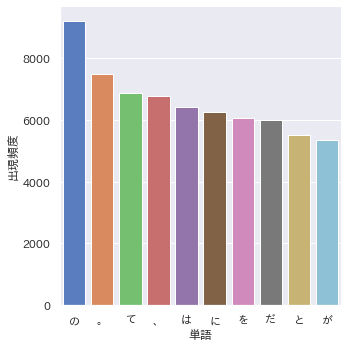

In [21]:
sns.catplot(x="単語", y="出現頻度", data=frequencies_top10, kind="bar")

## [37. 「猫」と共起頻度の高い上位10語](https://nlp100.github.io/ja/ch04.html#37-%E7%8C%AB%E3%81%A8%E5%85%B1%E8%B5%B7%E9%A0%BB%E5%BA%A6%E3%81%AE%E9%AB%98%E3%81%84%E4%B8%8A%E4%BD%8D10%E8%AA%9E)
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [22]:
cooccurrences = {}

for sentence in sentences:
    if not any([morpheme["base"] == "猫" for morpheme in sentence]):
        continue

    for morpheme in sentence:
        base = morpheme["base"]
        if base != "猫" and base in cooccurrences:
            cooccurrences[base] += 1
        elif base != "猫":
            cooccurrences[base] = 1

cooccurrences = sorted(cooccurrences.items(),
                       key=lambda x:x[1],
                       reverse=True)

In [23]:
cooccurrences_top10 = pd.DataFrame({
    "単語": [cooccurrences[i][0] for i in range(10)],
    "共起頻度": [cooccurrences[i][1] for i in range(10)],
})

In [24]:
cooccurrences_top10

,単語,共起頻度
0,の,391
1,は,272
2,、,252
3,に,250
4,を,232
5,だ,231
6,て,229
7,。,209
8,と,202
9,が,180


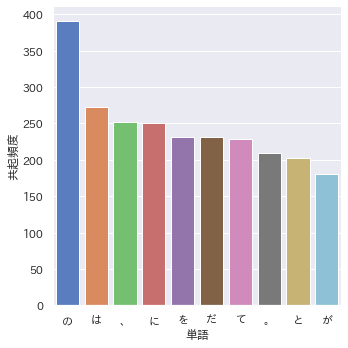

In [25]:
sns.catplot(x="単語", y="共起頻度", data=cooccurrences_top10, kind="bar")

## [38. ヒストグラム](https://nlp100.github.io/ja/ch04.html#38-%E3%83%92%E3%82%B9%E3%83%88%E3%82%B0%E3%83%A9%E3%83%A0)
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

In [26]:
frequency2count = {}

for frequency in frequencies:
    if frequency[1] in frequency2count:
        frequency2count[frequency[1]] += 1
    else:
        frequency2count[frequency[1]] = 1

frequency2count = sorted(frequency2count.items(),
                         key=lambda x:x[0],
                         reverse=True)

In [27]:
data_count = pd.DataFrame({
    "出現頻度": [frequency[0] for frequency in frequency2count],
    "単語の種類数": [count[1] for count in frequency2count],
})

In [28]:
data_count.head(20)

,出現頻度,単語の種類数
0,9194,1
1,7486,1
2,6848,1
3,6772,1
4,6420,1
5,6243,1
6,6071,1
7,5975,1
8,5508,1
9,5337,1


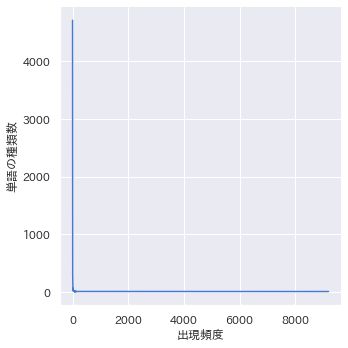

In [29]:
sns.relplot(x="出現頻度", y="単語の種類数", data=data_count, kind="line")

## [39. Zipfの法則](https://nlp100.github.io/ja/ch04.html#39-zipf%E3%81%AE%E6%B3%95%E5%89%87)
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

In [30]:
from math import log

In [31]:
rank_log = []
count_log = []
count = 0

for i, frequency in enumerate(frequencies):
    if frequency[1] != count:
        rank = i + 1
        count = frequency[1]
        rank_log.append(log(rank))
        count_log.append(log(count))

In [32]:
data_zipf = pd.DataFrame({
    "log(出現頻度順位)": rank_log,
    "log(出現頻度)": count_log,
})

In [33]:
data_zipf

,log(出現頻度順位),log(出現頻度)
0,0.000000,9.126306
1,0.693147,8.920790
2,1.098612,8.831712
3,1.386294,8.820552
4,1.609438,8.767173
...,...,...
236,7.867489,1.609438
237,8.029433,1.386294
238,8.208764,1.098612
239,8.440312,0.693147


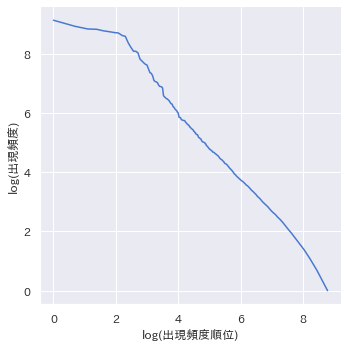

In [34]:
sns.relplot(x="log(出現頻度順位)", y="log(出現頻度)", data=data_zipf, kind="line")